# Arabic Tweets Sentiment Anaylsis

## Introduction

This dataset we collected in April 2019 by an company. It contains 58K Arabic tweets annotated in positive and negative labels, The company collected this dataset to provide Arabic sentiment corpus for the research the comapny doing to investigate deep learning approaches for Arabic sentiment analysis. The dataset is balanced and collected using positive and negative emojis lexicon.

## Exploring and downloading the Text data files

In [2]:
import pandas as pd

In [18]:
tweets_data_negative = pd.read_csv('/content/train_Arabic_tweets_negative_20190413.tsv',sep='\t',header=None, encoding='utf-8')
tweets_data_positive = pd.read_csv('/content/train_Arabic_tweets_positive_20190413.tsv',sep='\t',header=None, encoding='utf-8')

In [19]:
tweets_data_negative.head()

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [20]:
tweets_data_positive.head()

,0,1
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


we see that there is two labels "neg" and "pos" in the class seprated in two dataframes so i said i work on them together in one dataframe so i will concate them for better exploration on the data.

In [21]:
fulldf = pd.concat([tweets_data_negative,tweets_data_positive], ignore_index=True)

In [22]:
fulldf.head()

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [23]:
fulldf.describe()

,0,1
count,45275,45275
unique,2,29449
top,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq,22761,349


In [24]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45275 entries, 0 to 45274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       45275 non-null  object
 1   1       45275 non-null  object
dtypes: object(2)
memory usage: 707.5+ KB


In [25]:
fulldf.columns

Int64Index([0, 1], dtype='int64')

In [26]:
fulldf.columns = ['class','Tweets']

In [27]:
fulldf.columns


Index(['class', 'Tweets'], dtype='object')

In [28]:
fulldf.head()

,class,Tweets
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


we need to make sure that we have both neg and pos rows too 

In [29]:
fulldf['class'].unique()

array(['neg', 'pos'], dtype=object)

Checking for nulls:

In [34]:
fulldf.isna().sum()

class     0
Tweets    0
dtype: int64

# Data Exploration and cleaning

first lets import the libraries we will need in this project.

First lets install our graphics tools from python like:
 
*    plotly: plotly.py is an interactive, open-source, and browser-based graphing library for Python https://github.com/plotly/plotly.py

*   cufflinks: This library binds the power of plotly with the flexibility of pandas for easy plotting. https://github.com/santosjorge/cufflinks



In [30]:
!pip install plotly

In [31]:
!pip install cufflinks

now the rest of the important libraries:

In [32]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
import re as regex
import numpy as np
import plotly
from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

now we need to clean the tweets texts and do some tokenization and stemming and maybe adding more feauters to the dataframe

Lets do some visualization for the distrbution of the target class:

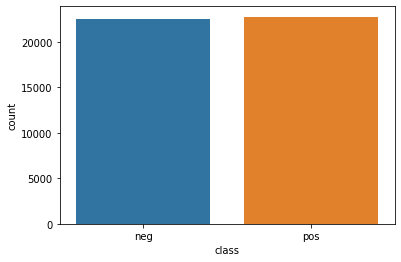

In [33]:
sns.countplot(x='class',data=fulldf)

Now lets start with cleaning the data:

In [ ]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub('http\S+\s*', ' ', tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet